In [2]:
import torch
from torchvision import models
from torch import nn, optim
from torch.utils.data import DataLoader
from torch.autograd import Variable
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from PIL import Image

import numpy as np
import os
import time

In [ ]:
!/opt/bin/nvidia-smi

In [18]:

# 定义一些超参数
batch_size = 100  #批大小
learning_rate = 0.005  #学习率
num_epoches = 100    #期望训练次数

In [7]:
#数据预处理
data_transform = transforms.Compose([                         
    transforms.Resize([224, 224], Image.BILINEAR),                          #对图像大小统一
    transforms.ToTensor(),                                 #将图片(Image)转成Tensor，归一化至[0, 1]
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[    
                             0.229, 0.224, 0.225])       #标准化至[-1, 1]，规定均值和标准差
         ])


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


In [8]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [10]:
#获取训练数据集
train_dataset = ImageFolder(root='drive/MyDrive/graduation project/work/devide data/train',transform=data_transform)
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle=True)

In [11]:
train_dataset[0][0].size()

torch.Size([3, 224, 224])

In [12]:
classes = ('洋紫荆','大滨菊','黄钟木', '木棉花', '向日葵')
#类别
data_classes = classes

In [13]:
#选择模型
net = models.alexnet()

In [14]:
#重写全连接层
net.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 5),
        )

In [15]:
#损失函数和优化器
#交叉熵损失
criterion = nn.CrossEntropyLoss()
#随机梯度下降法SGD
optimizer = optim.SGD(net.parameters(), lr=learning_rate)

In [16]:
#选择CPU还是GPU的操作
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [19]:
startTime = time.time()
train_loss = []
#开始训练
for epoch in range(num_epoches):
 
    running_loss = 0.
    
    for i, data in enumerate(train_loader):
        
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        inputs, labels = Variable(inputs), Variable(labels)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        print('[%d, %5d] loss: %.4f' %(epoch + 1, (i+1)*batch_size, loss.item()))

    '''
    #可以每隔一段时间保存一次模型参数
    if((epoch+1)%100 == 0) :
        torch.save(net.state_dict(), 'alexnet_flower_'+str(epoch+1)+'.pkl')
    if((epoch+1)%20 == 0) :
        print('是否继续训练？')
        a=input()
        if (a=='y'):
            continue
        else:
            break
    '''

    
    print('[%d] loss: %.4f' %(epoch + 1,running_loss))
    train_loss.append(running_loss)

endTime = time.time()
print('Finished Training')
print('执行时间：' + str((endTime - startTime)) + "s")

#保存模型参数
torch.save(net.state_dict(), 'drive/MyDrive/graduation project/model training/flower.pt')

[1,   100] loss: 1.6100
[1,   200] loss: 1.6099
[1,   300] loss: 1.6083
[1,   400] loss: 1.6081
[1,   500] loss: 1.6072
[1,   600] loss: 1.6080
[1,   700] loss: 1.6091
[1,   800] loss: 1.6109
[1,   900] loss: 1.6099
[1,  1000] loss: 1.6089
[1,  1100] loss: 1.6089
[1,  1200] loss: 1.6100
[1,  1300] loss: 1.6108
[1,  1400] loss: 1.6083
[1,  1500] loss: 1.6081
[1,  1600] loss: 1.6063
[1,  1700] loss: 1.6095
[1,  1800] loss: 1.6068
[1,  1900] loss: 1.6088
[1] loss: 30.5679
[2,   100] loss: 1.6057
[2,   200] loss: 1.6084
[2,   300] loss: 1.6076
[2,   400] loss: 1.6065
[2,   500] loss: 1.6088
[2,   600] loss: 1.6102
[2,   700] loss: 1.6085
[2,   800] loss: 1.6073
[2,   900] loss: 1.6053
[2,  1000] loss: 1.6063
[2,  1100] loss: 1.6082
[2,  1200] loss: 1.6053
[2,  1300] loss: 1.6063
[2,  1400] loss: 1.6046
[2,  1500] loss: 1.6086
[2,  1600] loss: 1.6056
[2,  1700] loss: 1.6035
[2,  1800] loss: 1.6091
[2,  1900] loss: 1.6045
[2] loss: 30.5304
[3,   100] loss: 1.6078
[3,   200] loss: 1.6049
[3, 

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
train_loss

[30.567866444587708,
 30.53037965297699,
 30.496695041656494,
 30.456282258033752,
 30.42628502845764,
 30.38458740711212,
 30.34251344203949,
 30.318044304847717,
 30.277540802955627,
 30.238394021987915,
 30.20324146747589,
 30.1759614944458,
 30.137000918388367,
 30.1108980178833,
 30.06526803970337,
 30.007365942001343,
 29.945204615592957,
 29.92555832862854,
 29.86237931251526,
 29.79287827014923,
 29.742833495140076,
 29.678545713424683,
 29.616789937019348,
 29.577507495880127,
 29.505401849746704,
 29.49574041366577,
 29.34717071056366,
 29.242581248283386,
 29.222904324531555,
 29.04607903957367,
 28.880963563919067,
 28.60868012905121,
 28.399510264396667,
 28.07765221595764,
 27.60393738746643,
 27.164517998695374,
 26.71523892879486,
 26.234378695487976,
 25.831924319267273,
 25.364102840423584,
 24.911797046661377,
 24.570648789405823,
 24.206249475479126,
 23.85761272907257,
 23.369176268577576,
 22.974695324897766,
 22.346508383750916,
 21.45933771133423,
 20.5982674360

[30.567866444587708, 30.53037965297699, 30.496695041656494, 30.456282258033752, 30.42628502845764, 30.38458740711212, 30.34251344203949, 30.318044304847717, 30.277540802955627, 30.238394021987915, 30.20324146747589, 30.1759614944458, 30.137000918388367, 30.1108980178833, 30.06526803970337, 30.007365942001343, 29.945204615592957, 29.92555832862854, 29.86237931251526, 29.79287827014923, 29.742833495140076, 29.678545713424683, 29.616789937019348, 29.577507495880127, 29.505401849746704, 29.49574041366577, 29.34717071056366, 29.242581248283386, 29.222904324531555, 29.04607903957367, 28.880963563919067, 28.60868012905121, 28.399510264396667, 28.07765221595764, 27.60393738746643, 27.164517998695374, 26.71523892879486, 26.234378695487976, 25.831924319267273, 25.364102840423584, 24.911797046661377, 24.570648789405823, 24.206249475479126, 23.85761272907257, 23.369176268577576, 22.974695324897766, 22.346508383750916, 21.45933771133423, 20.598267436027527, 19.64562690258026, 18.752496004104614, 17

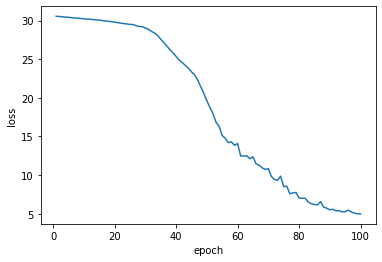

In [22]:
#绘图
print(train_loss)
x = np.arange(1,num_epoches + 1) 
plt.xlabel("epoch") 
plt.ylabel("loss")
plt.plot(x,train_loss) 
plt.show()